In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
from scipy.stats import norm
import scipy.stats as stats
import pandas as pd
%matplotlib inline


print("packages imported")

packages imported


In [12]:
# load data
cust_data = pd.read_csv("customer_data_2025.csv")
cust = pd.DataFrame(cust_data)
weather_data = pd.read_csv("weatherstats_vancouver_daily_2025.csv")
weather = pd.DataFrame(weather_data)

# Start

First some eda on both things

In [13]:
# Eda
print(cust.describe())
print("----------------------------------------------")

            Hour  January_Frequency_Customers_Alumni_Centre  \
count  12.000000                                  12.000000   
mean   12.500000                                 506.750000   
std     3.605551                                 258.977754   
min     7.000000                                  87.000000   
25%     9.750000                                 337.750000   
50%    12.500000                                 578.500000   
75%    15.250000                                 716.750000   
max    18.000000                                 815.000000   

       January_Frequency_Customers_Sauder  \
count                           12.000000   
mean                           398.416667   
std                            224.501654   
min                              0.000000   
25%                            272.500000   
50%                            463.000000   
75%                            599.250000   
max                            662.000000   

       July_Frequency_Cust

In [14]:
print(weather.describe())

               Year         Month           Day  temperature      humidity  \
count  10227.000000  10227.000000  10227.000000  10227.00000  10227.000000   
mean    2010.501027      6.522930     15.729637     10.60254     78.104821   
std        8.078184      3.448872      8.800522      5.84021      9.464733   
min     1997.000000      1.000000      1.000000    -11.55000     25.000000   
25%     2004.000000      4.000000      8.000000      6.15000     72.000000   
50%     2011.000000      7.000000     16.000000     10.19000     78.500000   
75%     2017.500000     10.000000     23.000000     15.65000     85.000000   
max     2024.000000     12.000000     31.000000     28.40000    100.000000   

       precipitation  
count   10227.000000  
mean        3.193889  
std         6.473059  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         3.600000  
max        91.600000  


# Implementation of the cost function thing
$$
C(T, P) = max\{c(T, P), 0\} 
$$
$$
c(T, P) = C_{0} + a(T − T_{0})^2 − b(P − P_{0}) − c(H − H_{0})^2, 
$$
where:  
-  the total daily customers is C, 
- the average daily temperature is T,  (can get from data.csv)
- the average daily hummidity is H, (can get from data.csv)
- the total daily precipitation is P, (can get from data.csv)
- the reference number of customers is C0, 
- the reference temperature is T0, 
- the reference precipitation is P0, 
- the reference Humidity is H0, 
- the rate of change of customers with respect to (square) temperature is a. 
- the rate of change of customers with respect to precipitation is b.
- the rate of change of customers with respect to (square) humidity is c.


NOTE I think she defintly meant to include the custormer function to be:
$$
c(T,P,H)
$$

In [15]:
# random intial run through with some mean values for the "x0"s and 1 for params
a,b,c,c0,t0,p0,h0 = [1,1,1,500,10,3,78]
def cFunc(TempDay,PrecipatationDay,HumidatyDay):
    return c0+a*(TempDay-t0)**2-b*(PrecipatationDay-p0)-c*(HumidatyDay-h0)**2

sampleDay = cFunc(20,0,50)
C = np.max(sampleDay,0)
print(f"Number of custormers is = {C}")

Number of custormers is = -181


# Build solutions
1. Need to make a menu array(of prices) that custormers sample from randomly when purchasing. Can get the prices from loafe data and maybe we make some assumitions on how a custormer samples from the menu(average purchase with some variance? long tail maybe because you have family's or groups of people sometimes paying all together).
- I think we make a new random varible $X$ which repersents how much money \$ a custormer spends when at loafe.
  
2. Each day revunune will be = $C(T,P,H) \cdot X$, for some given $T,P,H$ values of that day.

3. Total year revune will be $\sum_{i=0}^{364}C(T_i,P_i,H_i) \cdot X$

4. I think also we should do what Erics idea was of making PDF's for each $T_i,P_i,H_i$ (where $i \in [0,364]$) well do this with KDES. So to produce day 1 revune we produce one random sample from the distrubution of $T_1,P_1,H_1$.

5. This means we will have $365 \cdot 3$ KDE's to make so this might get a little computation expensive.

6. We can extract each days data into its own smaller data frame with some like $T_1$ = all rows with column index $\equiv 1 \pmod{27}$ or whatever we need here.(index from 1 or 0? not sure)
 

# Note
Below is bassically data manipulation and construction of the PDFS per month, the list "listOfMonthPDFs" is the key list that contains all the nesscary data.

In [16]:
print(weather.head())

   Year  Month  Day  temperature  humidity  precipitation
0  2024     12   31         4.95      91.0            1.4
1  2024     12   30         4.25      99.0           10.7
2  2024     12   29         5.09      96.5            8.1
3  2024     12   28         8.55      87.5            7.1
4  2024     12   27         6.75      90.5            5.0


In [51]:
# want to split data into 12 different data sets based off months 
# so januray data is all the rows that have a "1" in the month column 
listOfMonthData = []
for i in range(1,13):
    listOfMonthData.append(weather.loc[weather['Month']==i])
print(listOfMonthData[0])
# listOfMonthData[i] = data for i+1 month number
# i.e listOfMonthData[0] = data for (0+1) = jan month number

       Year  Month  Day  temperature  humidity  precipitation
335    2024      1   31        11.20      91.5            8.9
336    2024      1   30        11.50      86.5            1.8
337    2024      1   29        11.25      93.5            4.6
338    2024      1   28        11.10      95.5           16.1
339    2024      1   27         9.80      99.5           39.7
...     ...    ...  ...          ...       ...            ...
10222  1997      1    5         2.60      85.0            0.0
10223  1997      1    4         3.85      89.0            1.0
10224  1997      1    3         3.85      82.0            0.0
10225  1997      1    2         7.45      84.5           15.4
10226  1997      1    1         7.35      85.5           11.4

[868 rows x 6 columns]


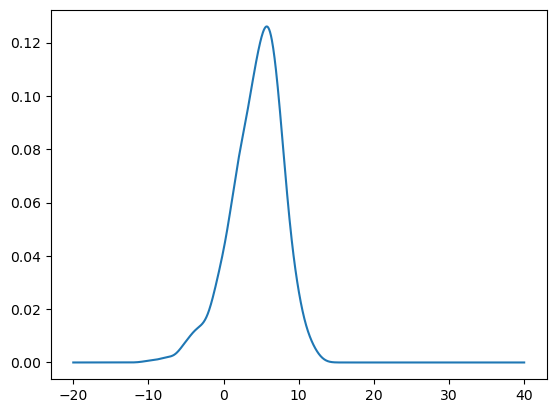

In [54]:
# class to hold each months 3 pdfs (and name which is a int from [1-12])
class Month():
    def __init__(self,name,month_pdf_T,month_pdf_P,month_pdf_H):
        self.name = name
        self.month_pdf_T = month_pdf_T
        self.month_pdf_P = month_pdf_P
        self.month_pdf_H = month_pdf_H

# construct all months objects and store in list
listOfMonthPDFs = []
for i in range(12):
    month = listOfMonthData[i]
    month_pdf_T = stats.gaussian_kde(month['temperature'])
    month_pdf_P = stats.gaussian_kde(month['precipitation'])
    month_pdf_H = stats.gaussian_kde(month['humidity'])
    month_i = Month(str(i+1),month_pdf_T,month_pdf_P,month_pdf_H) #object creation
    listOfMonthPDFs.append(month_i) # append to list of objects
    

jan_temp_pdf = listOfMonthPDFs[0].month_pdf_T # how to access jan's temp if needed
x = np.linspace(-20,40,1000) # temp probably not going under 40 or over 40 in januaray
plt.plot(x,jan_temp_pdf(x))
plt.show()

# Start of param estimates section

The intial idea of how to achive estimates of $a,b,c$ that me and eric thought of is as follows:
1. We have dataset of custormer frequncey data in 2025. It gives data in the form of:
Hour interval , Number of custormer in that hour interval for the entire month(per location).
2. We have 2 months worth of this data (namely januray and july).
3. Take for example $a$ it must be in units of $\frac{custormers}{(Temprature)^2}$
4. So the idea is to aproximate $a$ by taking this custormer data set which shows the number of custormers change from jan-july, and combine this with our created PDF's of temprature change from jan-july (using the mean values of these PDF's):
$$a=\frac{\text{(Avg\_Daily\_Custormers\_July)-(Avg\_Daily\_Custormers\_Jan)}}{\text{(Temprature\_mean\_July-t0)}^2-(Temprature\_mean\_Jan-t0)^2}$$    

In [58]:
# now here it is in code
cust.tail()

,Hour,January_Frequency_Customers_Alumni_Centre,January_Frequency_Customers_Sauder,July_Frequency_Customers_Alumni_Centre,July_Frequency_Customers_Sauder
7,14,815,662,478,378
8,15,737,607,397,312
9,16,704,524,375,0
10,17,624,512,312,0
11,18,107,0,54,0


Jan total customers  = 10862
July total customers = 5438
Mean temprature in jan = 4.352188940092167
Mean temprature in july = 18.38799539170507


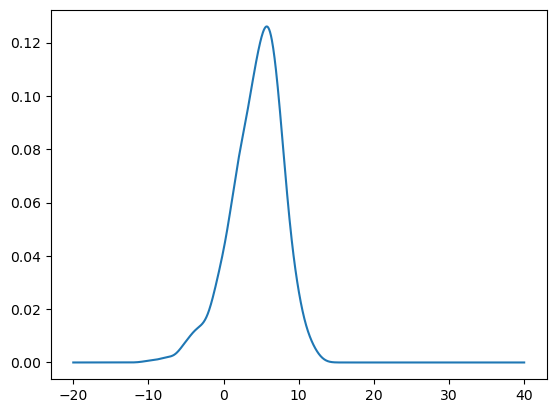

In [165]:
January_Total_Customers_Loafe = np.sum(cust['January_Frequency_Customers_Alumni_Centre']+cust['January_Frequency_Customers_Sauder'])
print("Jan total customers  = "+str(January_Total_Customers_Loafe))

July_Total_Customers_Loafe = np.sum(cust['July_Frequency_Customers_Alumni_Centre']+cust['July_Frequency_Customers_Sauder'])
print("July total customers = "+str(July_Total_Customers_Loafe))

Avg_Daily_Custormers_July = July_Total_Customers_Loafe/30
Avg_Daily_Custormers_Jan = January_Total_Customers_Loafe/30

avg_daily_customer_change = Avg_Daily_Custormers_July-Avg_Daily_Custormers_Jan

# kinda annoying but scipy has no function for pdf.mean() so you have to take intergrals instead to get E[x]:
x_a = np.linspace(-20,40,1000) # temp probably not going under 40 or over 40 in januaray
jan_pdf_T = listOfMonthPDFs[0].month_pdf_T(x_a)
july_pdf_T = listOfMonthPDFs[6].month_pdf_T(x_a)

# This is how we extract the mean values
jan_mean_temp = np.trapezoid(x_a * jan_pdf_T, x_a)
july_mean_temp = np.trapezoid(x_a * july_pdf_T, x_a)

print("Mean temprature in jan = "+str(jan_mean_temp)) # the actual temprature mean value
print("Mean temprature in july = "+str(july_mean_temp))

# just a sanity check
plt.plot(x_a,jan_pdf_T)
plt.show()

Average customer change jan vs july = -180.79999999999998
a =-4.700902855782438
b = 38.77972819971235


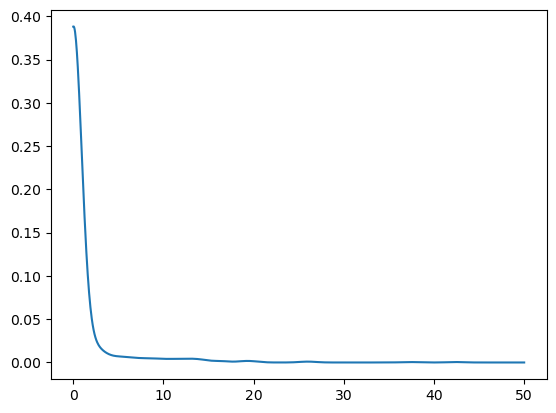

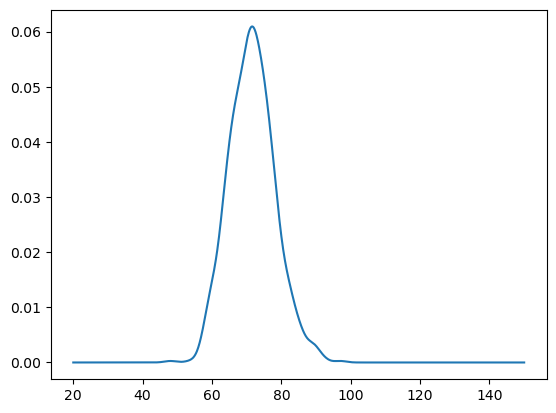

c = -0.9972902243371427


In [166]:
# finally we have 
t0 = 10
p0 = 13
h0 = 85

print(f"Average customer change jan vs july = {avg_daily_customer_change}")

a = avg_daily_customer_change/((july_mean_temp-t0)**2-(jan_mean_temp-t0)**2)
print("a ="+str(a))


# doing the same for others we have
x_b = np.linspace(0,50,1000) # rain probably not going more then 100
jan_pdf_P = listOfMonthPDFs[0].month_pdf_P(x_b)
july_pdf_P = listOfMonthPDFs[6].month_pdf_P(x_b)

jan_mean_precip = np.trapezoid(x_b * jan_pdf_P, x_b)
july_mean_precip = np.trapezoid(x_b * july_pdf_P, x_b)
#print(jan_mean_precip)
#print(july_mean_precip)

b = avg_daily_customer_change/((july_mean_precip-p0)-(jan_mean_precip-p0))
print("b = "+str(b))
# random checek to see what july's pdf looks like 
plt.plot(x_b,july_pdf_P)
plt.show()

### 
x_c = np.linspace(20,150,1000) # hummidity seems to range from around 20-100
jan_pdf_H = listOfMonthPDFs[0].month_pdf_H(x_c)
july_pdf_H = listOfMonthPDFs[6].month_pdf_H(x_c)

jan_mean_humid = np.trapezoid(x_c * jan_pdf_H, x_c)
july_mean_humid = np.trapezoid(x_c * july_pdf_H, x_c)
#print(jan_mean_humid)
#print(july_mean_humid)
plt.plot(x_c,july_pdf_H)
plt.show()

c = avg_daily_customer_change/((july_mean_humid-h0)**2-(jan_mean_humid-h0)**2)
print("c = "+str(c))

In [167]:
# Now with our random values we have
# a = -4.7 (temp matters a little)
# b = 38.77 (rain matters a lot)
# c = -0.99 (humidity almost doesnt matter)
c0 = 280 # random guess that this is probaly the average
def cFunc(TempDay,PrecipatationDay,HumidatyDay):
    return c0+a*(TempDay-t0)**2-b*(PrecipatationDay-p0)-c*(HumidatyDay-h0)**2

sampleDay = cFunc(20,0,88)
C = np.max(sampleDay,0)

print(f"Number of custormers is = {C}")

Number of custormers is = 323.02179303705105


Okay so maybe not so bad of a intail estimate of 323 customers in a day? This is for a hot day with 0 rain. Testing with a different values:

In [170]:
sampleDay2 = cFunc(7,5,90)
C2 = np.max(sampleDay2,0)

print(f"Number of custormers is = {C2}")

Number of custormers is = 572.8619555040855


So more rain gives more customers?? Doesnt quite make sense but maybe we are close.

Now well assume they have a average purchase of 15\$ on the loafe menu. And see what yearly revune would be.

In [181]:
# code to get what month we are in and how many days it has (ingorning leap years)
days_per_month = np.array([31,29,31,30,31,30,31,31,30,31,30,31])
month_edges = np.cumsum(days_per_month)

def dayToMonth(day):
    return np.searchsorted(month_edges, day)  # 0–11 (finds the index where a value would fit into a sorted array)
        
def dailyRev(month):
    T_hat = listOfMonthPDFs[month].month_pdf_T.resample(1)
    P_hat = listOfMonthPDFs[month].month_pdf_P.resample(1)
    H_hat = listOfMonthPDFs[month].month_pdf_H.resample(1)
    sampleDay = cFunc(T_hat,P_hat,H_hat)
    customersDay = np.max(sampleDay,0)
    return customersDay*15


    
def yearlyRev():
    total = 0
    for i in range(364):
        month = dayToMonth(i) # like for example day 64 is in march so therefore month = 2
        dayRev = dailyRev(month)
        total+=dayRev
    return total
yearRev = yearlyRev()
print("revune for year = "+str(yearRev))

revune for year = [3561820.81573244]


Dam so we predict that loafe makes 3 million $ per year in revuneue. 

# random stuff that doesnt really work

220.72790525858926


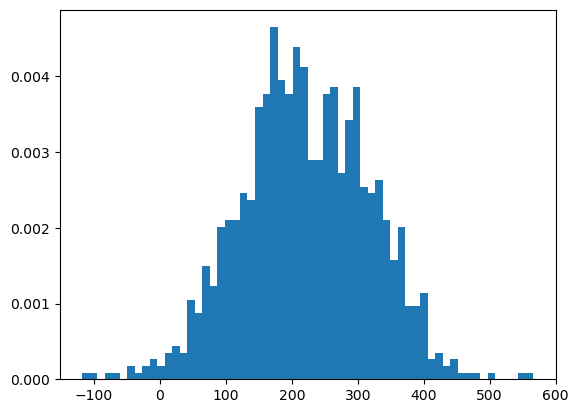

In [19]:
### Monte carlos 
# add noise to just a, a = 10 start
N = 1000 # number of times to eval the cFunc 
C_s = []
a0,b0,c0,cust0,t0,p0,h0 = [10,1,1,500,10,3,78]
for i in range(N):
    a = a0+np.random.normal(0,1,size = 1)
    C = np.max(cFunc(20,0,50),0)
    C_s.append(C)

C_average = np.mean(C_s)
print(C_average)
plt.hist(C_s,bins=60,density=True)
plt.show()


286.7996196025683


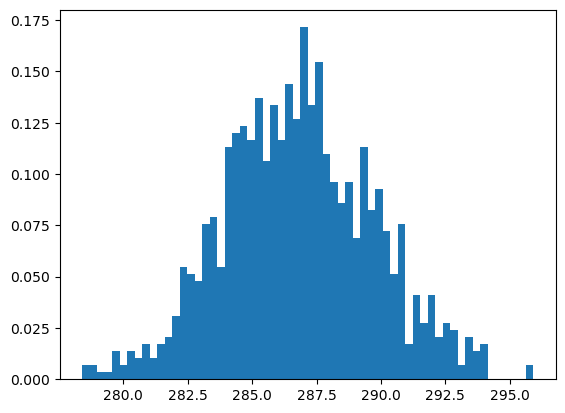

In [20]:
### Monte carlos 
# add noise to just b, a = 10 start
N = 1000 # number of times to eval the cFunc 
C_s = []
a0,b0,c0,cust0,t0,p0,h0 = [10,1,1,500,10,3,78]
for i in range(N):
    b = b0+np.random.normal(0,1,size = 1)
    C = np.max(cFunc(20,0,50),0)
    C_s.append(C)

C_average = np.mean(C_s)
print(C_average)
plt.hist(C_s,bins=60,density=True)
plt.show()

306.5872955175991


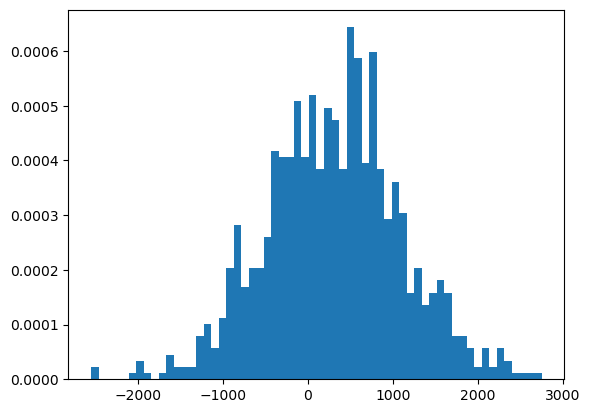

In [21]:
### Monte carlos 
# add noise to just c, c = 1 start
N = 1000 # number of times to eval the cFunc 
C_s = []
a0,b0,c0,cust0,t0,p0,h0 = [10,1,1,500,10,3,78]
for i in range(N):
    c = c0+np.random.normal(0,1,size = 1)
    C = np.max(cFunc(20,0,50),0)
    C_s.append(C)

C_average = np.mean(C_s)
print(C_average)
plt.hist(C_s,bins=60,density=True)
plt.show()